<a href="https://colab.research.google.com/github/thaislin0/Modelos-de-Machine-Learning/blob/main/Modelo_%C3%81rvore_de_Decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo Árvore de Decisão
Objetivo da análise: dado uma base de funcionários de uma empresa, com informações sobre: tempo que está na empresa, em qual departamento trabalha, qual o nível e qual linguagem de programação utiliza, o método Árvore de Decisão tentará prever qual a linguagem de programação que um novo funcionário (fora da base) provavelmente irá programar.

In [1]:
# Importação da biblioteca pandas com o apelido pd 
import pandas as pd

In [3]:
# Criação de uma variável com a função de leitura de excel e o caminho do arquivo
base = pd.read_excel('/content/funcionarios.xlsx')

In [4]:
# Verificação das cinco primeiras linhas da base. A função head() pode ser utilizada com qualquer número que desejar, sendo que 5 é o padrão
base.head()

,Unnamed: 0,tempo (anos),departamento_ciencia de dados,departamento_programacao,departamento_web,nivel_pleno,nivel_senior,linguagem
0,0,1,0,0,0,0,0,R
1,1,6,0,0,1,0,1,Rubi
2,2,3,1,0,0,1,0,Python
3,3,2,0,0,1,0,0,Java
4,4,4,0,1,0,1,0,Java


In [5]:
# Remoção da coluna 'Unnamed: 0' pois apresentava dados desnecessários
del base['Unnamed: 0']

In [6]:
# Visualização completa dos dados
base

,tempo (anos),departamento_ciencia de dados,departamento_programacao,departamento_web,nivel_pleno,nivel_senior,linguagem
0,1,0,0,0,0,0,R
1,6,0,0,1,0,1,Rubi
2,3,1,0,0,1,0,Python
3,2,0,0,1,0,0,Java
4,4,0,1,0,1,0,Java
5,2,0,0,1,1,0,PHP
6,3,0,0,0,1,0,Python
7,2,1,0,0,1,0,Python
8,10,0,0,1,0,1,PHP
9,5,0,1,0,1,0,C#


In [7]:
# x: seleção de todas as linhas e colunas, menos a última, pois ela é a coluna que nosso modelo irá tentar prever
#y: selecção de todas as linhas, porém apenas a última coluna, pois ela servirá como treinamento para o modelo
x = base.iloc[:, :-1]
y = base.iloc[:, -1]

In [8]:
# Verificação do x sem a última coluna
x

,tempo (anos),departamento_ciencia de dados,departamento_programacao,departamento_web,nivel_pleno,nivel_senior
0,1,0,0,0,0,0
1,6,0,0,1,0,1
2,3,1,0,0,1,0
3,2,0,0,1,0,0
4,4,0,1,0,1,0
5,2,0,0,1,1,0
6,3,0,0,0,1,0
7,2,1,0,0,1,0
8,10,0,0,1,0,1
9,5,0,1,0,1,0


In [10]:
# Verificação do y, com apenas a última coluna
y

0         R
1      Rubi
2    Python
3      Java
4      Java
5       PHP
6    Python
7    Python
8       PHP
9        C#
Name: linguagem, dtype: object

# Modelo Árvore de Decisão
 Uma árvore de decisão é uma estrutura de árvore para representar os possíveis caminhos na tomada de uma decisão. Cada caminho é um possível resultado. Existe uma raiz, ou seja, a variável escolhida pela árvore e em seguida uma hierarquia. A variável X será o modelo de entrada, ou seja, as colunas e os atributos. Já o Y será o modelo de saída, ou seja, é o alvo que que queremos atingir. O alvo nunca poderá entrar no momento da modelagem, pois estaríamos utilizando a resposta para chegar em uma resposta.

 No modelo de Árvore de Decisão podemos alterar alguns paramêtros, como o critério de avaliação e a profundidade da árvore. No entanto, é necessário tomar cuidado para não gerar uma profundidade muito alta, pois geraria um Overfiting, ou seja, um treinamento muito alto do modelo.

 Leia mais em: https://minerandodados.com.br/arvores-de-decisao-conceitos-e-aplicacoes/

In [11]:
# Importando do sklearn o modelo DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [12]:
# Atribuição de uma variável à função do DecisionTreeClassifier()
modelo_tree = DecisionTreeClassifier()

In [13]:
# Treinamento do modelo com as variáveis x e y
modelo_tree.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
# Criando uma amostra dos dados originais para teste do modelo. Neste caso, foi escolhido a linguagem 'Python
amostra = base.sample()
amostra

,tempo (anos),departamento_ciencia de dados,departamento_programacao,departamento_web,nivel_pleno,nivel_senior,linguagem
6,3,0,0,0,1,0,Python


In [17]:
# Teste do modelo com a amostra. O modelo acertou.
modelo_tree.predict(amostra.iloc[:, :-1])

array(['Python'], dtype=object)

In [18]:
# Teste do modelo com novos dados sendo inseridos. Cada valor corresponde a uma coluna. O funcionário utilizaria PHP.
modelo_tree.predict([[2, 0, 0, 1, 1, 0]])

array(['PHP'], dtype=object)

In [19]:
# Importação do graphviz para visualizar a Árvore de Decisão
from sklearn.tree import export_graphviz

In [20]:
# Atribuição de uma variável e escolha do nome do arquivo que será aberto
arquivo = open("arvore.dot", "w")

In [21]:
# Selecionando apenas os nomes das colunas
x.columns

Index(['tempo (anos)', 'departamento_ciencia de dados',
       'departamento_programacao', 'departamento_web', 'nivel_pleno',
       'nivel_senior'],
      dtype='object')

In [22]:
# Selecionando os valores únicos que há na coluna linguagem
base.linguagem.unique()

array(['R', 'Rubi', 'Python', 'Java', 'PHP', 'C#'], dtype=object)

In [23]:
# Criação do gráfico que demonstra a árvore de decisão
export_graphviz(modelo_tree, out_file=arquivo, 
                feature_names=x.columns,
                class_names=base.linguagem.unique())

In [24]:
# Fechamento do arquivo
arquivo.close()

In [25]:
# Importação das bibliotecas sklearn e matplotlib para a visualização da Árvore de Decisão
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

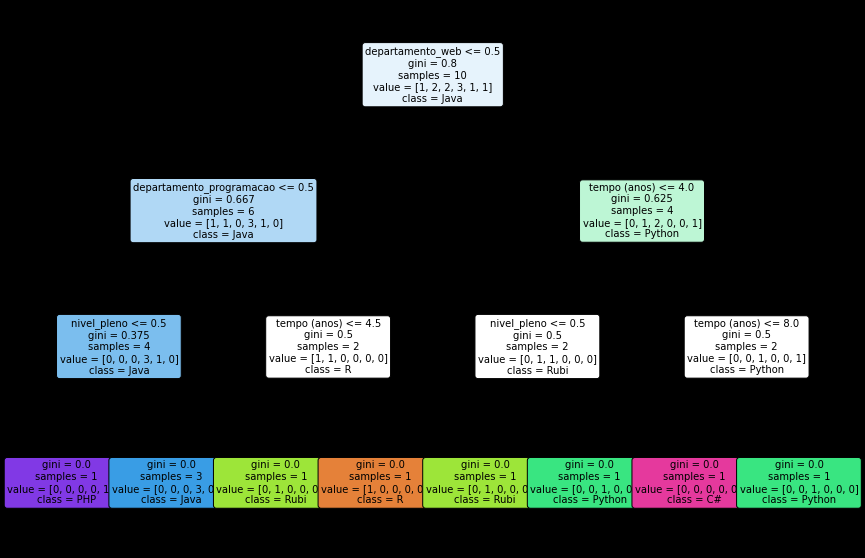

In [26]:
# Criação da figura com as variáveis necessárias
fig, ax = plt.subplots(figsize=(15, 10), facecolor='k')
tree.plot_tree(modelo_tree, 
               ax=ax,
               fontsize=10,
               rounded=True,
               filled=True,
               feature_names=x.columns,
               class_names=base.linguagem.unique())

plt.show()

# Resumo
Primeiro, importamos as bibliotecas necessárias para a análise e os dados e iniciamos uma visualização e tratamento simples desses dados. Em seguida, importamos a biblioteca de Machine Learning (sklearn) com o modelo DecisionTreeClassifier.

Após, foi feito o treinamento do modelo e alguns testes de previsão. O modelo acertou corretamente o teste. 

Bibliotecas utilziadas nessa análise:

pandas: https://pandas.pydata.org/ 
scikit-learn: https://scikit-learn.org/stable/